# ELEC0134 - Applied Machine Learning Systems Assignment 22-23
## A1: Gender Detection

*Note preprocessing step is skipped as preprocessing was completed in SVM notebook.

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [7]:
# Loading in training and test data from npy files
X_train = np.load('all_features_train.npy')
y_train = np.load('gender_labels_train.npy')

X_test = np.load('all_features_test.npy')
y_test = np.load('gender_labels_test.npy')

In [8]:
print('features_train: ', X_train.shape)
print('features_test: ', X_test.shape)
print('labels_train: ', y_train.shape)
print('labels_test: ', y_test.shape)

features_train:  (4798, 136)
features_test:  (970, 136)
labels_train:  (4798,)
labels_test:  (970,)


In [54]:
param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
              'max_depth': [2, 4, 6, 8, 10]}


# rfm = random forest model
rfm = RandomForestClassifier()
random_search = RandomizedSearchCV(rfm, param_grid, verbose = 3, cv = 10, n_jobs = 4)
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   verbose=3)

In [57]:
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)
best_params_ = {'n_estimators': 200, 'max_depth': 8}

Best parameters:  {'n_estimators': 200, 'max_depth': 8}
Best score:  0.8645289665970772


In [58]:
rfm = RandomForestClassifier(**best_params_)

In [59]:
rfm.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [70]:
y_pred = rfm.predict(X_test)

# Evaluate the model's performance using different metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {acc:.3f}')
print(f'Precision: {prec:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1:.3f}')

Accuracy: 0.851
Precision: 0.877
Recall: 0.813
F1-score: 0.844


In [62]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

In [63]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None):


    axes[0].set_title(title)

    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs = -1, \
                       train_sizes = np.linspace(.1, 1.0, 5),
                       return_times = True)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    axes[0].grid()
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")
    axes[0].set_ylabel("Accuracy Score")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit times (s)")
    axes[1].set_title("Scalability of the model")
    return plt

[CV 2/10] END .....max_depth=6, n_estimators=50;, score=0.852 total time=   0.3s
[CV 6/10] END .....max_depth=6, n_estimators=50;, score=0.850 total time=   0.3s
[CV 9/10] END .....max_depth=6, n_estimators=50;, score=0.860 total time=   0.3s
[CV 3/10] END ...max_depth=10, n_estimators=250;, score=0.865 total time=   2.1s
[CV 7/10] END ...max_depth=10, n_estimators=250;, score=0.875 total time=   2.0s
[CV 10/10] END ..max_depth=10, n_estimators=250;, score=0.871 total time=   2.0s
[CV 8/10] END ....max_depth=2, n_estimators=250;, score=0.850 total time=   0.7s
[CV 2/10] END ....max_depth=8, n_estimators=250;, score=0.860 total time=   1.7s
[CV 6/10] END ....max_depth=8, n_estimators=250;, score=0.856 total time=   1.7s
[CV 10/10] END ...max_depth=8, n_estimators=250;, score=0.868 total time=   1.7s
[CV 4/10] END ....max_depth=4, n_estimators=100;, score=0.831 total time=   0.4s
[CV 8/10] END ....max_depth=4, n_estimators=100;, score=0.863 total time=   0.4s
[CV 2/10] END ....max_depth=

<module 'matplotlib.pyplot' from '/home/zceeysa/Desktop/ENTER/lib/python3.8/site-packages/matplotlib/pyplot.py'>

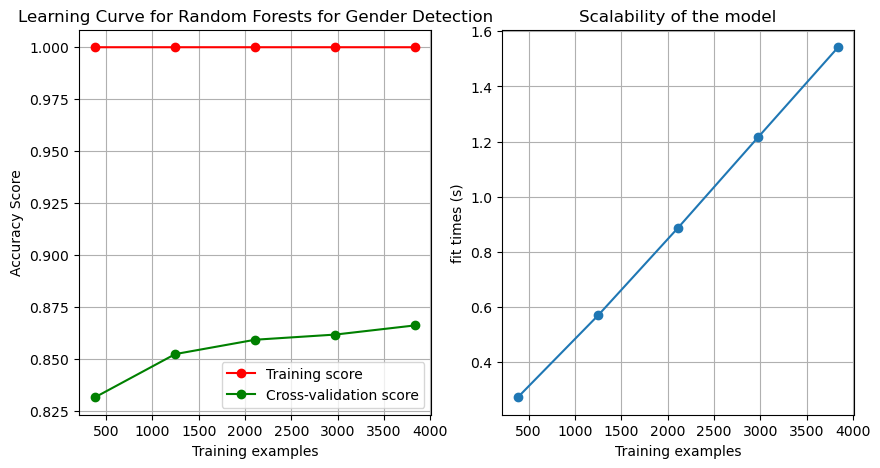

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot learning curve for Random Forests 
title = "Learning Curve for Random Forests for Gender Detection"


cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
plot_learning_curve(rfm, title, X_train, y_train, axes=axes, 
                    ylim=(0.7, 1.01), cv = cv)

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [68]:

# Assume that y_true are the true labels and y_pred are the predicted labels
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print(conf_mat)

[[0.88752556 0.11247444]
 [0.18711019 0.81288981]]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
def plot_ROC_curve(model, features_test, labels_test, title = None):

    # predict the scores of the positive class
    y_scores = model.decision_function(features_test)

    # calculate the false positive rate, true positive rate and thresholds
    fpr, tpr, thresholds = roc_curve(labels_test, y_scores)

    # calculate the AUC
    auc = roc_auc_score(labels_test, y_scores)
    
    # plot the ROC curve
    if title:
        plt.title(title)
        
    plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
plot_ROC_curve(rmf, X_test, y_test, title = 'ROC curve for Random Forest model for Gender Detection')